In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess
import shlex
import numpy as np

In [2]:
def run_simulation (N, M, K1, K2, ratio, model):
    
    
    

    command = '../bt_model.out ' + str(N) + ' ' + str(M) + ' ' + str(K1) + ' ' + str(K2) + ' ' + str(model) + ' ' + str(ratio) 
#     print(shlex.split(command))

    process = subprocess.Popen(shlex.split(command), stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    
    ##parse output
    output = process.communicate()[0].decode("utf-8")
#     print (output)


    G = {}
    G['N'] = int(output.split()[0])
    G['M'] = int(output.split()[1])
    G['prior'] = float(output.split()[2])
    G['like_ho'] = float(output.split()[3])
    G['like_hol'] = float(output.split()[4])
    G['like_bin'] = float(output.split()[5])

    
    HO = {}
    HO['log_err'] = float(output.split()[6])
    HO['spear'] = float(output.split()[7])
    HO['kend'] = float(output.split()[8])
    HO['prior'] = float(output.split()[9])
    HO['like_ho'] = float(output.split()[10])
    HO['like_hol'] = float(output.split()[11])
    HO['Iteration'] = int(output.split()[24])
    
    HOL = {}
    HOL['log_err'] = float(output.split()[12])
    HOL['spear'] = float(output.split()[13])
    HOL['kend'] = float(output.split()[14])
    HOL['prior'] = float(output.split()[15])
    HOL['like_ho'] = float(output.split()[16])
    HOL['like_hol'] = float(output.split()[17])
    
    BIN = {}
    BIN['log_err'] = float(output.split()[18])
    BIN['spear'] = float(output.split()[19])
    BIN['kend'] = float(output.split()[20])
    BIN['prior'] = float(output.split()[21])
    BIN['like_ho'] = float(output.split()[22])
    BIN['like_hol'] = float(output.split()[23])
    BIN['Iteration'] = int(output.split()[25])
    
    return G, HO, HOL, BIN 

In [3]:
def vary_sample_size (N, K1, K2,ratio,model):
    
    data = []
    
    M = np.logspace(2, 6, num =10, endpoint=True, base=10.0)
    for m in M:
        G, HO, HOL, BIN = run_simulation (N, int(m), K1, K2, ratio, model)
        data.append([G, HO, HOL, BIN])
    
    return data


def generate_figure (data, ax, col):
    
    matrix = np.zeros((5, len(data)))
    
    
    
    for i in range(0, len(data)):
        
        G = data[i][0]
        HO = data[i][1]
        HOL = data[i][2]
        BIN = data[i][3]
        
        matrix[0][i] = G['M']
        if col in G:
            matrix[1][i] = G[col]
            matrix[2][i] = HO[col]-G[col]
            matrix[3][i] = HOL[col]-G[col]
            matrix[4][i] = BIN[col]-G[col]
        else:
            matrix[2][i] = HO[col]
            matrix[3][i] = HOL[col]
            matrix[4][i] = BIN[col]
        

   
    ax.plot(matrix[0,:], matrix[2,:], color ='blue', marker='s', markersize=10, alpha =0.5, label = 'HO')
    ax.plot(matrix[0,:], matrix[3,:], color ='orange', marker='d', markersize=10, alpha =0.5, label = 'HOL')
    ax.plot(matrix[0,:], matrix[4,:], color ='black', marker='v', markersize=10, alpha =0.5, label = 'BIN')

In [4]:
N = 1000
M = 10000
K1 = 4
K2 = 10
ratio = 0.8
model = 1

G, HO, HOL, BIN = run_simulation (N, M, K1, K2, ratio, model)



In [5]:
# print (G)
# print (HO)
# print (HOL)
# print (BIN)

In [6]:
data = vary_sample_size (N, K1, K2, ratio, model)

In [7]:
# print (data)

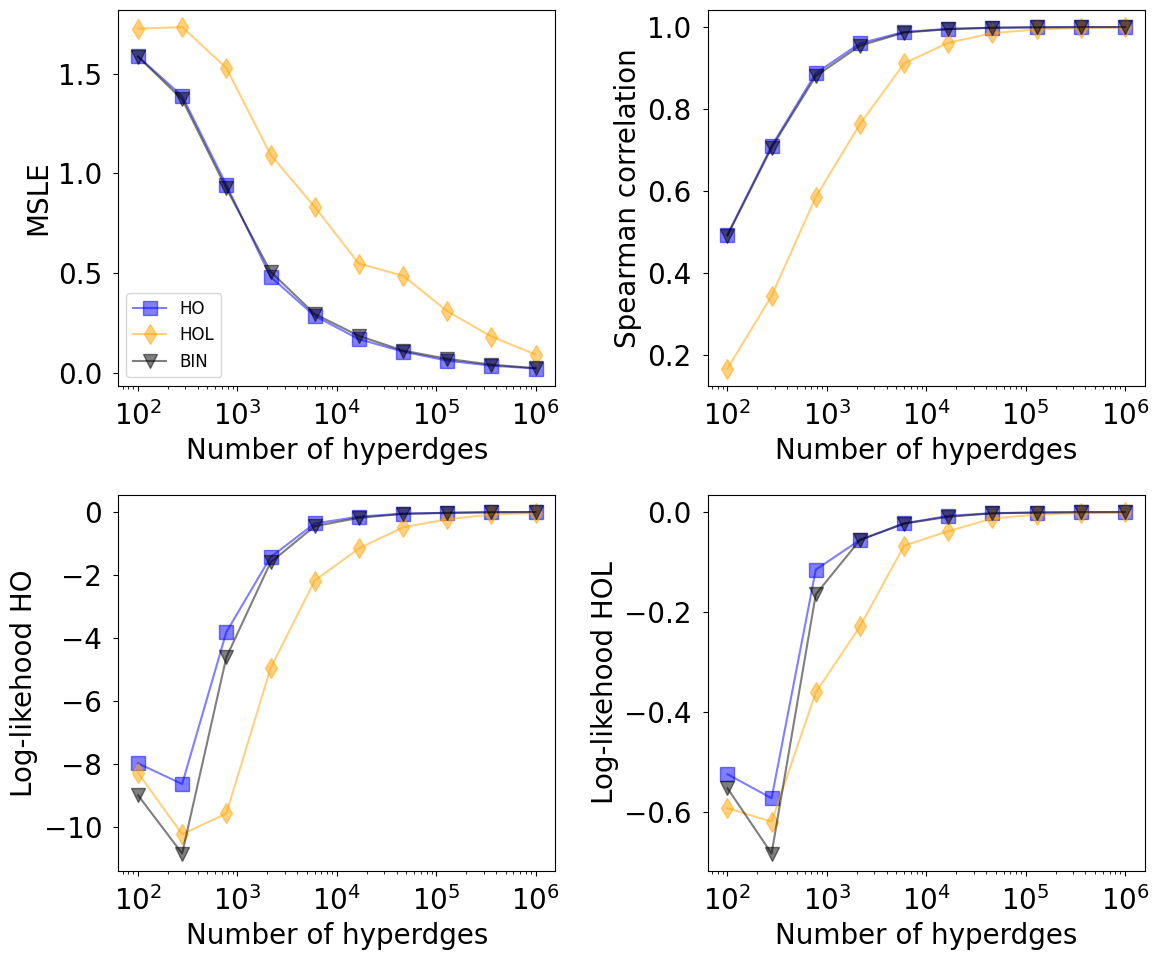

In [8]:
fig = plt.figure(figsize=(12, 10))

plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


generate_figure (data, ax1, 'log_err')
ax1.set_xscale('log')
ax1.legend(loc='lower left', fontsize = 12)
ax1.set_xlabel('Number of hyperdges')
ax1.set_ylabel('MSLE')


generate_figure (data, ax2, 'spear')
ax2.set_xscale('log')
# ax2.legend(loc='lower left', fontsize = 12)
ax2.set_xlabel('Number of hyperdges')
ax2.set_ylabel('Spearman correlation')


generate_figure (data, ax3, 'like_ho')
ax3.set_xscale('log')
ax3.set_xlabel('Number of hyperdges')
ax3.set_ylabel('Log-likehood HO')

generate_figure (data, ax4, 'like_hol')
ax4.set_xscale('log')
ax4.set_xlabel('Number of hyperdges')
ax4.set_ylabel('Log-likehood HOL')

fig.tight_layout()

## Fixed number of hyperedges

In [9]:
def hist_at_given_sample_size (N, M, K1, K2,ratio, model, T):
    
    data = []
    
    for t in range(0, T):
        G, HO, HOL, BIN = run_simulation (N, M, K1, K2, ratio, model)
        data.append([G, HO, HOL, BIN])
    
    return data


def generate_hist (data, ax, col):
    
    matrix = np.zeros((4, len(data)))
    
    for i in range(0, len(data)):
        
        G = data[i][0]
        HO = data[i][1]
        HOL = data[i][2]
        BIN = data[i][3]
        
        
        if col in G:
            matrix[0][i] = G[col]
            matrix[1][i] = HO[col]#-G[col]
            matrix[2][i] = HOL[col]#-G[col]
            matrix[3][i] = BIN[col]#-G[col]
        else:
            matrix[1][i] = HO[col]
            matrix[2][i] = HOL[col]
            matrix[3][i] = BIN[col]
        
    
   
    ax.hist(matrix[1,:], bins=20, density=True, color ='blue', alpha =0.5, label = 'HO')
    ax.hist(matrix[2,:], bins=20, density=True, color ='green', alpha =0.5, label = 'HOL')
    ax.hist(matrix[3,:], bins=20, density=True, color ='red', alpha =0.5, label = 'BIN')
    

def compare_data (data, col):
    
    count1 = count2 = count3 = total = 0.0
    
    for i in range(0, len(data)):
        
        G = data[i][0]
        HO = data[i][1]
        HOL = data[i][2]
        BIN = data[i][3]
        
        total += 1.0
        if HO[col] <= BIN[col]:
            count1 += 1.0
        if HO[col] <= HOL[col]:
            count2 += 1.0
        if HOL[col] <= BIN[col]:
            count3 += 1.0
            
    print ('#', col)
    print('#P(HO <= BIN) = ', count1/total)
    print('#P(HO <= HOL) = ', count2/total)
    print('#P(HOL <= BIN) = ', count3/total)
    print('\n\n')

In [10]:
N = 1000
M = 10000
K1 = 5
K2 = 10
ratio = 0.8
model = 1
T = 1000
data_lr = hist_at_given_sample_size (N, M, K1, K2,ratio, model, T)

# log_err
#P(HO <= BIN) =  1.0
#P(HO <= HOL) =  1.0
#P(HOL <= BIN) =  0.0



# spear
#P(HO <= BIN) =  0.0
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  1.0



# like_ho
#P(HO <= BIN) =  0.001
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  1.0



# like_hol
#P(HO <= BIN) =  0.112
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  1.0





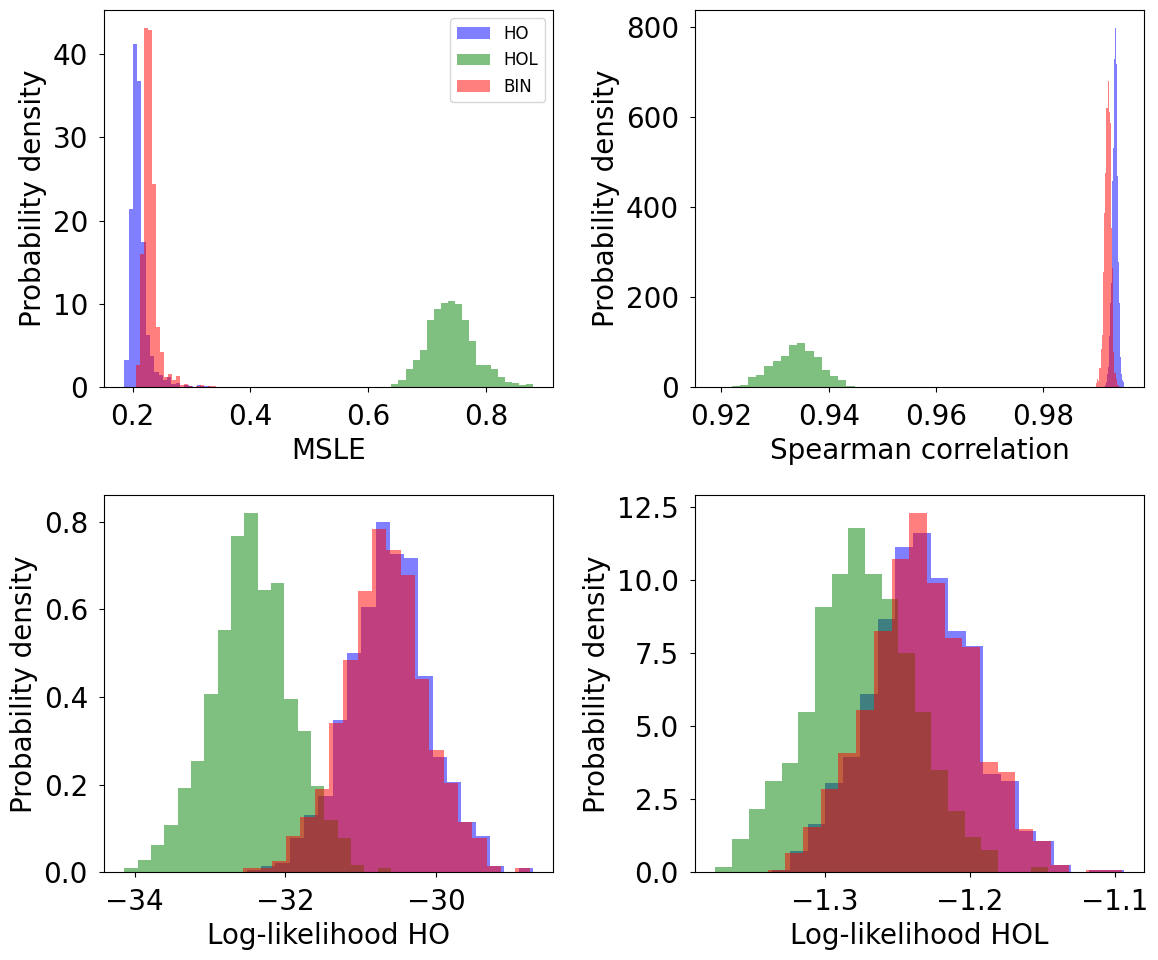

In [11]:
fig = plt.figure(figsize=(12, 10))

plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


generate_hist (data_lr, ax1, 'log_err')
# ax1.set_xscale('log')
ax1.legend(loc='upper right', fontsize = 12)
compare_data (data_lr, 'log_err')
ax1.set_ylabel('Probability density')
ax1.set_xlabel('MSLE')


generate_hist (data_lr, ax2, 'spear')
# ax2.set_xscale('log')
# ax2.legend(loc='lower left', fontsize = 12)
compare_data (data_lr, 'spear')
ax2.set_ylabel('Probability density')
ax2.set_xlabel('Spearman correlation')


generate_hist (data_lr, ax3, 'like_ho')
# ax3.set_xscale('log')
compare_data (data_lr, 'like_ho')
ax3.set_ylabel('Probability density')
ax3.set_xlabel('Log-likelihood HO')

generate_hist (data_lr, ax4, 'like_hol')
# ax4.set_xscale('log')
compare_data (data_lr, 'like_hol')
ax4.set_ylabel('Probability density')
ax4.set_xlabel('Log-likelihood HOL')

fig.tight_layout()

In [12]:
N = 1000
M = 10000
K1 = 5
K2 = 10
ratio = 0.8
model = 2
T = 1000
data_lr2 = hist_at_given_sample_size (N, M, K1, K2,ratio, model, T)

# log_err
#P(HO <= BIN) =  0.0
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  0.988



# spear
#P(HO <= BIN) =  1.0
#P(HO <= HOL) =  1.0
#P(HOL <= BIN) =  0.0



# like_ho
#P(HO <= BIN) =  0.0
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  0.0



# like_hol
#P(HO <= BIN) =  1.0
#P(HO <= HOL) =  1.0
#P(HOL <= BIN) =  0.0





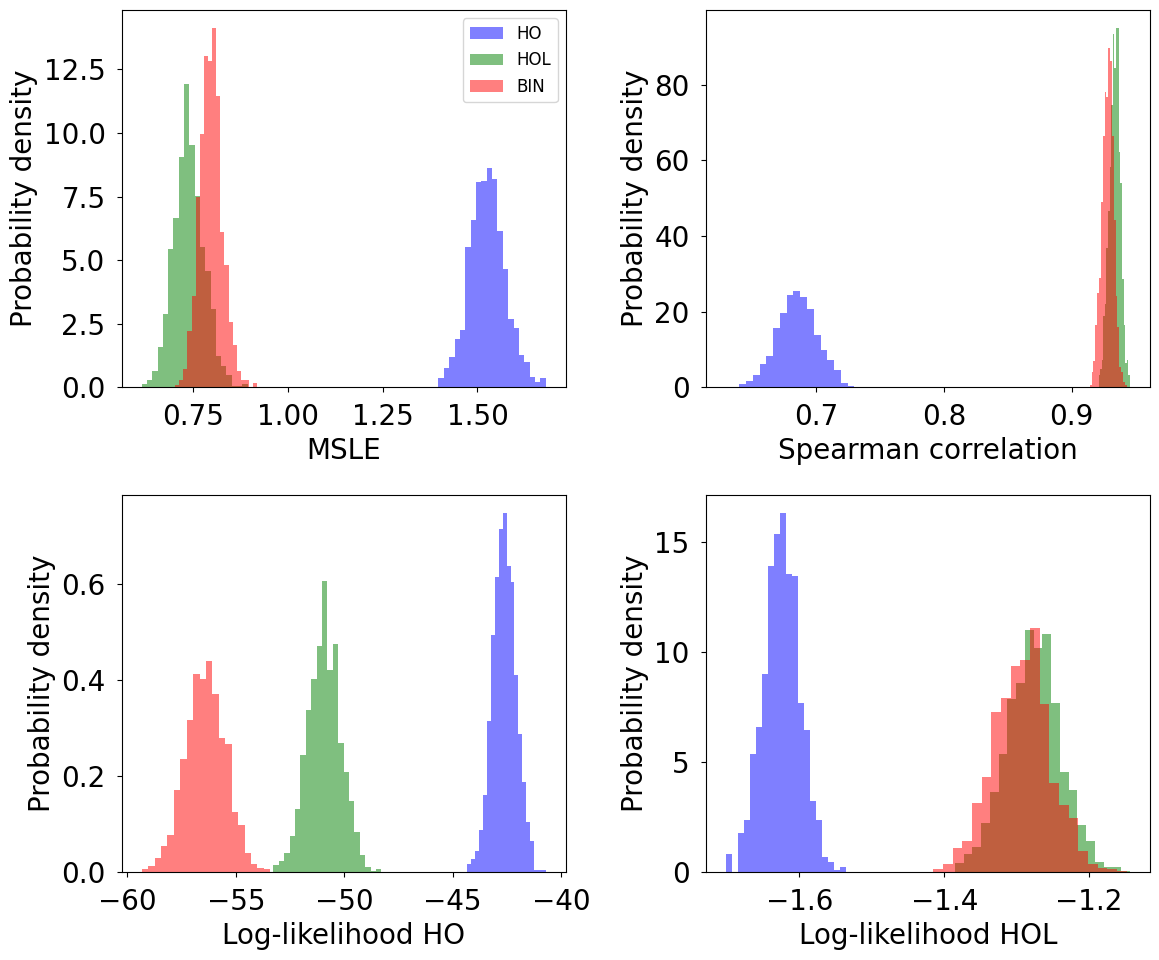

In [13]:
fig = plt.figure(figsize=(12, 10))

plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


generate_hist (data_lr2, ax1, 'log_err')
# ax1.set_xscale('log')
ax1.legend(loc='upper right', fontsize = 12)
compare_data (data_lr2, 'log_err')
ax1.set_ylabel('Probability density')
ax1.set_xlabel('MSLE')


generate_hist (data_lr2, ax2, 'spear')
# ax2.set_xscale('log')
# ax2.legend(loc='lower left', fontsize = 12)
compare_data (data_lr2, 'spear')
ax2.set_ylabel('Probability density')
ax2.set_xlabel('Spearman correlation')


generate_hist (data_lr2, ax3, 'like_ho')
# ax3.set_xscale('log')
compare_data (data_lr2, 'like_ho')
ax3.set_ylabel('Probability density')
ax3.set_xlabel('Log-likelihood HO')

generate_hist (data_lr2, ax4, 'like_hol')
# ax4.set_xscale('log')
compare_data (data_lr2, 'like_hol')
ax4.set_ylabel('Probability density')
ax4.set_xlabel('Log-likelihood HOL')

fig.tight_layout()

In [15]:
N = 1000
M = 10000
K1 = 5
K2 = 5
ratio = 0.8
model = 1
T = 100

HO_results = []
for i in range(T):
    G, HO, HOL, BIN = run_simulation (N, M, K1, K2, ratio, model)
    HO_results.append(HO['Iteration'])


print(np.mean(HO_results))



23.4
